# importing all future modules 
- To avoid incompitablity problems we import the future modules below


In [1]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function
from __future__ import unicode_literals


from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import make_scorer, accuracy_score
from sklearn.model_selection import GridSearchCV

from sklearn.model_selection import train_test_split


- importing all the required modules

In [1]:
import time  
import numpy as np
import pandas as pd
%matplotlib inline
import seaborn as sns
import matplotlib
from matplotlib import pyplot as plt


In [2]:
def run_time(method):
    
    '''defined a function run_time
    for finding the time taken to 
    execute the function'''
    
    def timed(*args, **kw):
        ts = time.time()
        result = method(*args, **kw)
        te = time.time()
        if 'log_time' in kw:
            name = kw.get('log_name', method.__name__.upper())
            kw['log_time'][name] = int((te - ts) * 1000)
        else:
            print('%r  %2.2f ms' % \
                  (method.__name__, (te - ts) * 1000))
        return result
    return timed


In [50]:
df = pd.read_csv('vehicles_passed.csv')
df.head()

,time,amp_read,vehicle
0,1,0.00,-
1,2,-0.05,-
2,3,0.10,-
3,4,0.50,Motorbike
4,5,0.40,Motorbike


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306 entries, 0 to 305
Data columns (total 3 columns):
time        306 non-null int64
amp_read    306 non-null float64
vehicle     306 non-null object
dtypes: float64(1), int64(1), object(1)
memory usage: 7.2+ KB


In [12]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
time,306.0,153.500000,88.478811,1.00,77.25,153.5,229.75,306.00
amp_read,306.0,1.355882,1.905291,-0.09,0.00,0.4,1.55,5.66


In [13]:

sum(df['vehicle']=='-')

144

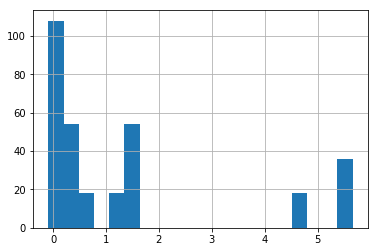

In [16]:
# plot the data to check the distribution
df['amp_read'].hist(bins=20)

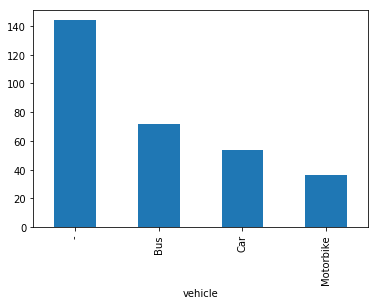

In [17]:
# plot the data to check the distribution
df.groupby('vehicle').size().plot(kind='bar')

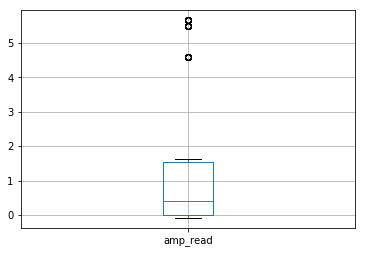

In [18]:
df.boxplot(column='amp_read')

In [54]:
#creating polynomial features

df['amp_square'] = df['amp_read']**2
df['amp_cube'] = df['amp_read']**3
df['amp_sqrt'] = df['amp_read']*0.5


#
df.amp_square = df.amp_square.round(3)
df.amp_cube = df.amp_cube.round(3)

In [55]:
s = df['amp_read']


indices = pd.Series(range(df['amp_read'].shape[0]))


df['amp_avg'] = indices[2:].apply(lambda x: (s[x]+s[x-1]+s[x-2]) / 3 )

#considering only 3 decimal values
df.amp_avg = df.amp_avg.round(3)

# as the first 2 variables will be zero we replace with zero
df.amp_avg.replace(np.NaN, 0, inplace=True)

df['deviation'] = df['amp_avg'] * df['amp_read']

df.deviation = df.deviation.round(3)

df.deviation.replace(np.NaN, 0, inplace=True)

In [56]:
df.head(20)

,time,amp_read,vehicle,amp_square,amp_cube,amp_sqrt,amp_avg,deviation
0,1,0.00,-,0.000,0.000,0.000,0.000,0.000
1,2,-0.05,-,0.003,-0.000,-0.025,0.000,-0.000
2,3,0.10,-,0.010,0.001,0.050,0.017,0.002
3,4,0.50,Motorbike,0.250,0.125,0.250,0.183,0.092
4,5,0.40,Motorbike,0.160,0.064,0.200,0.333,0.133
5,6,0.00,-,0.000,0.000,0.000,0.300,0.000
6,7,1.50,Bus,2.250,3.375,0.750,0.633,0.950
7,8,1.55,Bus,2.403,3.724,0.775,1.017,1.576
8,9,1.29,Bus,1.664,2.147,0.645,1.447,1.867
9,10,1.62,Bus,2.624,4.252,0.810,1.487,2.409


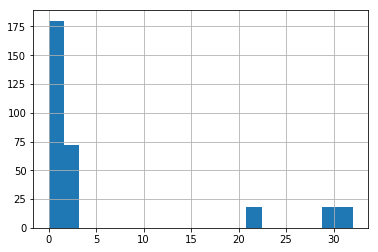

In [57]:
df['amp_square'].hist(bins=20)

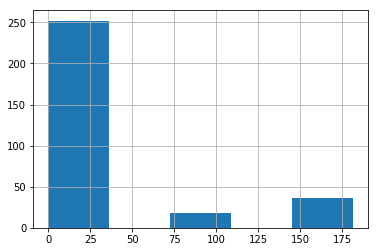

In [23]:
df['amp_cube'].hist(bins=5)

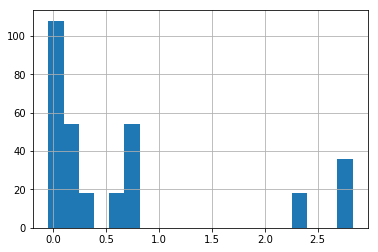

In [24]:
df['amp_sqrt'].hist(bins=20)

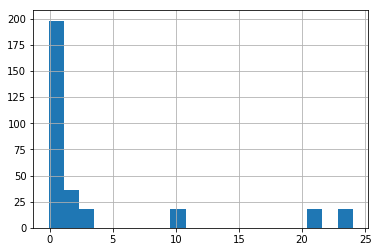

In [25]:
df['deviation'].hist(bins=20)

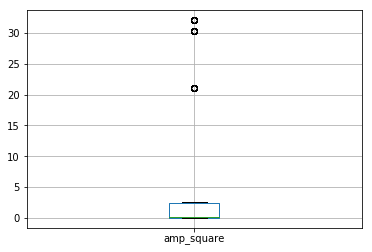

In [26]:
df.boxplot(column='amp_square')

In [27]:
# df.boxplot(column='amp_cube')

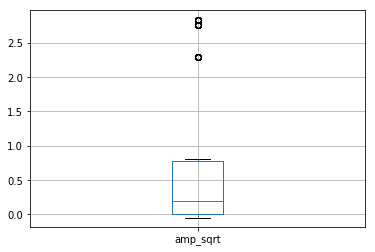

In [28]:
df.boxplot(column='amp_sqrt')

In [71]:
X = df.loc[:,['time', 'amp_read', 'amp_square', 'amp_cube', 'amp_sqrt', 'amp_avg', 'deviation']]
y = df.vehicle

In [72]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

In [73]:
clf = RandomForestClassifier(oob_score=True, random_state=0)
clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=True, random_state=0,
            verbose=0, warm_start=False)

In [74]:
def gridfunc(classifier, parameter, X_t, Y_t):
    
    
    clf = classifier
    
    parameters = parameter
    acc_scorer = make_scorer(accuracy_score)
    
    # Run the grid search
    grid_obj = GridSearchCV(clf, parameters, scoring=acc_scorer)
    grid_obj = grid_obj.fit(X_train, y_train)
    
    return grid_obj


In [75]:
classifier = RandomForestClassifier(oob_score=True, random_state=0)
# parameter = {}

parameter = {'n_estimators': [1, 2], 
              'max_features': ['log2'], 
              'criterion': ['gini'],
              'max_depth': [4, 5], 
              'min_samples_split': [5, 30],
              'min_samples_leaf': [1]
             }


In [76]:
grid = gridfunc(classifier, parameter, X_train, y_train)

grid.cv_results_

{'mean_fit_time': array([ 0.00581789,  0.00691938,  0.00388575,  0.00594966,  0.00351938,
         0.00578237,  0.00373197,  0.00593559]),
 'mean_score_time': array([ 0.0019478 ,  0.00155099,  0.00102091,  0.00144593,  0.0009466 ,
         0.00143695,  0.00104872,  0.00147875]),
 'mean_test_score': array([ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.]),
 'mean_train_score': array([ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.]),
 u'param_criterion': masked_array(data = [u'gini' u'gini' u'gini' u'gini' u'gini' u'gini' u'gini' u'gini'],
              mask = [False False False False False False False False],
        fill_value = ?),
 u'param_max_depth': masked_array(data = [4 4 4 4 5 5 5 5],
              mask = [False False False False False False False False],
        fill_value = ?),
 u'param_max_features': masked_array(data = [u'log2' u'log2' u'log2' u'log2' u'log2' u'log2' u'log2' u'log2'],
              mask = [False False False False False False False False],
        fill_value = ?),
 u'param_mi

In [77]:
clf = grid.best_estimator_
    
    # Fit the best algorithm to the data. 
clf.fit(X, y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion=u'gini',
            max_depth=4, max_features=u'log2', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=5, min_weight_fraction_leaf=0.0,
            n_estimators=1, n_jobs=1, oob_score=True, random_state=0,
            verbose=0, warm_start=False)

In [78]:
y_predict = clf.predict(X_test)
y_predict

array(['Bus', 'Bus', '-', 'Bus', '-', '-', 'Bus', '-', 'Bus', 'Bus', 'Bus',
       '-', '-', 'Car', 'Motorbike', 'Bus', '-', '-', 'Bus', '-', '-',
       'Bus', '-', 'Car', 'Bus', 'Bus', 'Car', 'Motorbike', '-', '-',
       'Car', '-', 'Bus', 'Motorbike', 'Bus', 'Bus', 'Bus', '-',
       'Motorbike', '-', '-', 'Motorbike', 'Bus', 'Bus', 'Car',
       'Motorbike', '-', '-', 'Car', 'Motorbike', '-', '-', '-', '-', '-',
       '-', 'Bus', 'Motorbike', '-', 'Bus', 'Car', '-'], dtype=object)

In [79]:
accuracy_score(y_test, y_predict)

1.0

In [67]:
#plot mean scores for a particular grid object
def hp_cv_scores(grid_obj):
    grid_obj.cv_results_
    mean_test_scores = grid_obj.cv_results_['mean_test_score']
    mean_train_scores = grid_obj.cv_results_['mean_train_score']
    plt.figure(figsize=(10,6))
    
    param_values =[str(x) for x in grid_obj.param_grid.values()[0]]
    x = np.arange(1, len(param_values)+1)
    
    plt.plot(x,mean_train_scores,c='r')
    plt.xticks(x,param_values)
    plt.plot(x,mean_test_scores,c='g')
    plt.xlabel(grid_obj.param_grid.keys()[0])
    plt.ylabel('mean scores')
    plt.show()

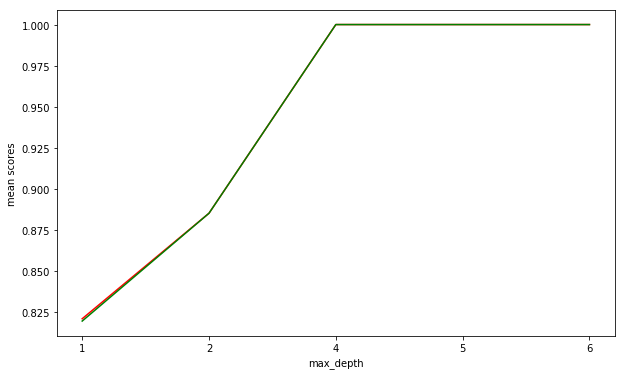

In [68]:
grid = gridfunc(classifier,{'max_depth': [ 1, 2, 4, 5 , 6]} , X_train, y_train)

hp_cv_scores(grid)

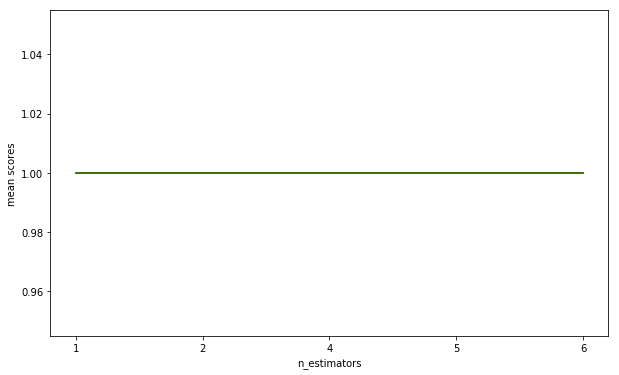

In [69]:
grid = gridfunc(classifier,{'n_estimators': [1, 2, 4, 5 , 6 ]} , X_train, y_train)

hp_cv_scores(grid)

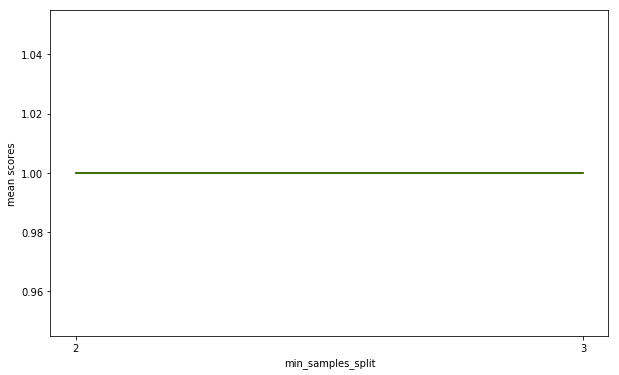

In [70]:
grid = gridfunc(classifier,{'min_samples_split': [ 2, 3]} , X_train, y_train)

hp_cv_scores(grid)